<a href="https://colab.research.google.com/github/kondjiri/Satellite-Imagery-and-Deep-Learning/blob/master/Satellite_Imagery_Classification_Using_ResNet50_Pretrained_Model_In_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model From Scratch**

## **Importation des modules**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import random
import pickle

from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc
# Keras librairies
from keras.models import Model,Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,Activation
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import load_img,img_to_array
from keras.applications.vgg16 import preprocess_input

## **Importation du dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Dataset**

In [ ]:
def dataset_preprocessing():
  # X_data
  x = open('/content/drive/My Drive/DataSet/X.pickle','rb')
  x_train = pickle.load(x)
  data = np.array(x_train).reshape(-1,224,224,3)

  # Y_data
  y = open('/content/drive/My Drive/DataSet/Y.pickle','rb')
  y_label = pickle.load(y)
  label = np.array(y_label).reshape(-1,1)
  train_y = to_categorical(label,21)
  return data,train_y


In [ ]:
tr,tr_y = dataset_preprocessing()

In [ ]:
tr.shape

(2100, 224, 224, 3)

In [ ]:
def dataset():
  x = open('/content/drive/My Drive/DataSet/X.pickle','rb')
  x_train = pickle.load(x)
  data = np.array(x_train).reshape(-1,224,224,3)

  # Y_data
  y = open('/content/drive/My Drive/DataSet/Y.pickle','rb')
  y_label = pickle.load(y)
  label = np.array(y_label).reshape(-1,1)
  train_x,test_x,train_y,test_y = train_test_split(data,label,test_size=0.2,random_state=10)
  train_x,test_x = (train_x.astype('float32'))/255.0,(test_x.astype('float32'))/255.0
  train_y,test_y = to_categorical(train_y,21),to_categorical(test_y,21)
  return train_x,test_x,train_y,test_y

## **Definition du Modele**

In [ ]:
def model_from_scratch():
  model = Sequential()
  ##in_sh = Input(shape=(224,224,3))
  model.add(Conv2D(32,(3,3),kernel_initializer='he_normal',activation='relu',input_shape=(224,224,3),padding='same'))
  model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform',activation='relu',padding='same'))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(64,(3,3),kernel_initializer='he_uniform',activation='relu',padding='same'))
  model.add(Conv2D(64,(3,3),kernel_initializer='he_uniform',activation='relu',padding='same'))
  #model.add(Conv2D(32,(3,3),kernel_initializer='he_normal',activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(128,(3,3),kernel_initializer='he_uniform',activation='relu',padding='same'))
  model.add(Conv2D(128,(3,3),kernel_initializer='he_uniform',activation='relu',padding='same'))
  #model.add(Conv2D(64,(3,3),kernel_initializer='he_normal',activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(1024,activation='relu',kernel_initializer='he_uniform'))
  #model.add(Dense(1024,activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(21,activation='softmax'))
  
  opt = Adam(learning_rate=1e-5)
  model.compile(loss=categorical_crossentropy,optimizer=opt,metrics=['accuracy'])
  return model

## **Data Augmentation**

In [ ]:
train_x,test_x,train_y,test_y = dataset()

In [ ]:
print('Training Set: train_x :{} & test_x :{} \n Label Set : train_y: {} & test_y : {}'.format(train_x.shape,test_x.shape,train_y.shape,test_y.shape))

Training Set: train_x :(1680, 224, 224, 3) & test_x :(420, 224, 224, 3) 
 Label Set : train_y: (1680, 21) & test_y : (420, 21)


In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(train_x)

## **Fitting the Model**

In [ ]:
batch_size = 32

In [ ]:
model = model_from_scratch()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 128)       7

In [ ]:
#model = neural_network_model()

#callback = [EarlyStopping(patience=3,monitor='val_accuracy')]
hist=model.fit_generator(datagen.flow(train_x,train_y,batch_size=batch_size),
                validation_data=(test_x,test_y)         
                ,epochs=50,
                verbose=1,
                steps_per_epoch=len(train_x)//batch_size,
                
                )
#hist = model.fit(train_x,train_y,verbose=1,epochs=5,validation_split=0.1,batch_size=batch_size)

Epoch 1/50
52/52 [==============================] - 19s 357ms/step - loss: 2.4664 - accuracy: 0.2415 - val_loss: 2.2549 - val_accuracy: 0.2952
Epoch 2/50
52/52 [==============================] - 19s 357ms/step - loss: 2.4124 - accuracy: 0.2494 - val_loss: 2.2309 - val_accuracy: 0.3452
Epoch 3/50
52/52 [==============================] - 19s 357ms/step - loss: 2.4149 - accuracy: 0.2464 - val_loss: 2.2053 - val_accuracy: 0.3286
Epoch 4/50
52/52 [==============================] - 18s 354ms/step - loss: 2.3430 - accuracy: 0.2718 - val_loss: 2.2657 - val_accuracy: 0.3000
Epoch 5/50
52/52 [==============================] - 18s 356ms/step - loss: 2.3254 - accuracy: 0.2712 - val_loss: 2.1323 - val_accuracy: 0.3857
Epoch 6/50
52/52 [==============================] - 19s 362ms/step - loss: 2.2670 - accuracy: 0.3058 - val_loss: 2.0718 - val_accuracy: 0.3714
Epoch 7/50
52/52 [==============================] - 19s 367ms/step - loss: 2.2304 - accuracy: 0.3125 - val_loss: 2.0754 - val_accuracy: 0.3571

In [ ]:
# loss,acc = model.evaluate(train_x,train_y,verbose=1)
# print('Training loss: {:.2f}\nTraining accuracy:  {:.2f}%'.format(loss,acc*100))

53/53 [==============================] - 1s 25ms/step - loss: 0.6315 - accuracy: 0.8042
Training loss: 0.63
Training accuracy:  80.42%


In [ ]:
# loss,acc = model.evaluate(test_x,test_y,verbose=1)
# print('Testing loss: {:.2f}\nTesting accuracy:  {:.2f}%'.format(loss,acc*100))

14/14 [==============================] - 0s 24ms/step - loss: 0.8095 - accuracy: 0.7452
Testing loss: 0.81
Testing accuracy:  74.52%


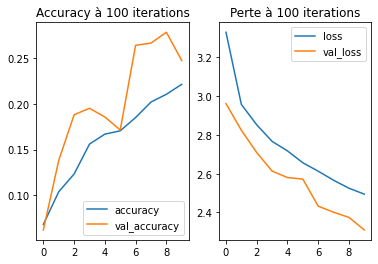

In [ ]:
plt.subplot(121)
for performance in ['accuracy','val_accuracy']:
  plt.plot(hist.history[performance],label=performance)
  plt.title('Accuracy à 100 iterations')
  plt.legend()
plt.subplot(122)
for performance in ['loss','val_loss']:
  plt.plot(hist.history[performance],label=performance)
  plt.title('Perte à 100 iterations')
  plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


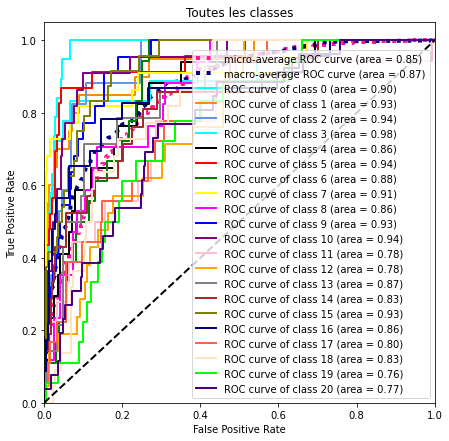

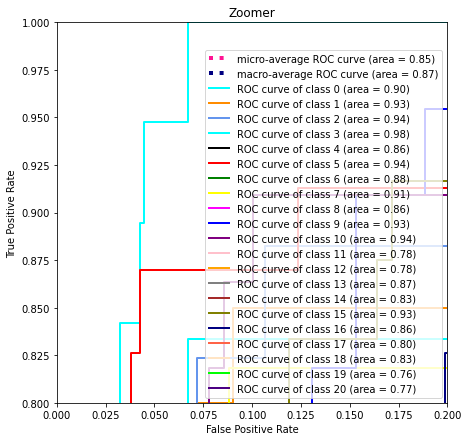

In [ ]:

y_score = model.predict(test_x)
lw = 2

n_classes=21
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=[7,7])
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle([
                'aqua',
                'darkorange',
                'cornflowerblue',
                'cyan',
                'black',
                'red',
                'green',
                'yellow',
                'magenta',
                'blue',
                'purple',
                'pink',
                'orange',
                'gray',
                'brown',
                'olive',
                'navy',
                'tomato',
                'bisque',
                'lime',
                'indigo'
                ])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Toutes les classes')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(figsize=[7,7])
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle([
                'aqua',
                'darkorange',
                'cornflowerblue',
                'cyan',
                'black',
                'red',
                'green',
                'yellow',
                'magenta',
                'blue',
                'purple',
                'pink',
                'orange',
                'gray',
                'brown',
                'olive',
                'navy',
                'tomato',
                'bisque',
                'lime',
                'indigo'
                ])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zoomer')
plt.legend(loc="lower right")
plt.show()

### **Make Prediction on Our model**

In [ ]:
def make_prediction(img_url=None):

  if img_url==None:
    print('Veuillez entrer une image ')
  else:
    image = load_img(img_url,target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    pred = model.predict_generator(image)[0]
    img = cv2.imread(img_url)
    r,b,g =cv2.split(img)
    img_show = cv2.merge([r,g,b]) 
    label_dict = {
              0:'agricultural',
              1:'airplane',
              2:'baseballdiamond',
              3:'beach',
              4:'buildings',
              5:'chaparral',
              6:'denseresidential',
              7:'forest',
              8:'freeway',
              9:'golfcourse',
              10:'harbor',
              11:'intersection',
              12:'mediumresidential',
              13:'mobilehomepark',
              14:'overpass',
              15:'parkinglot',
              16:'river',
              17:'runway',
              18:'sparseresidential',
              19:'storagetanks',
              20:'tenniscourt'
      }
    label = np.argmax(pred)
    plt.figure(figsize=[5,5])
    plt.imshow(img_show)
    plt.title(label_dict[label])
    plt.show()

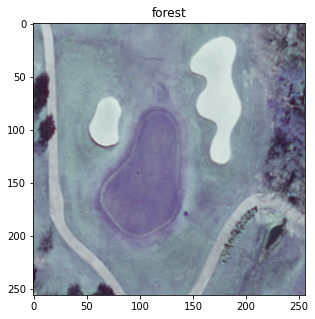

In [ ]:
make_prediction('/content/drive/My Drive/images/golfcourse178.png')